<h3> Standard Deviation by window Exploratory Analysis

In [4]:
#libraries

import os
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import utils


In [13]:
data = utils.load_data('/data/UKBB/kyra/capture24/P003.csv.gz')


In [ ]:
X_10, Y_10, T_10 = utils.make_windows(data, winsec=5)
X_1, Y_1, T_1 = utils.make_windows(data, winsec=1)



In [20]:
# set Y labels
anno_label_dict = pd.read_csv(
    "/data/UKBB/kyra/capture24/annotation-label-dictionary.csv",
    index_col='annotation', 
    dtype='string'
)
Y_10 = anno_label_dict.loc[Y_10, 'label:Willetts2018'].to_numpy()
Y_1 = anno_label_dict.loc[Y_1, 'label:Willetts2018'].to_numpy()

In [21]:
M_10 = np.linalg.norm(X_10, axis=2)

M_norm_10= M_10-1

mean_m_10= np.mean(M_norm_10, axis=1)

sd_m_10=np.std(M_norm_10, axis=1)

M_1 = np.linalg.norm(X_1, axis=2)

M_norm_1= M_1-1

mean_m_1= np.mean(M_norm_1, axis=1)

sd_m_1=np.std(M_norm_1, axis=1)


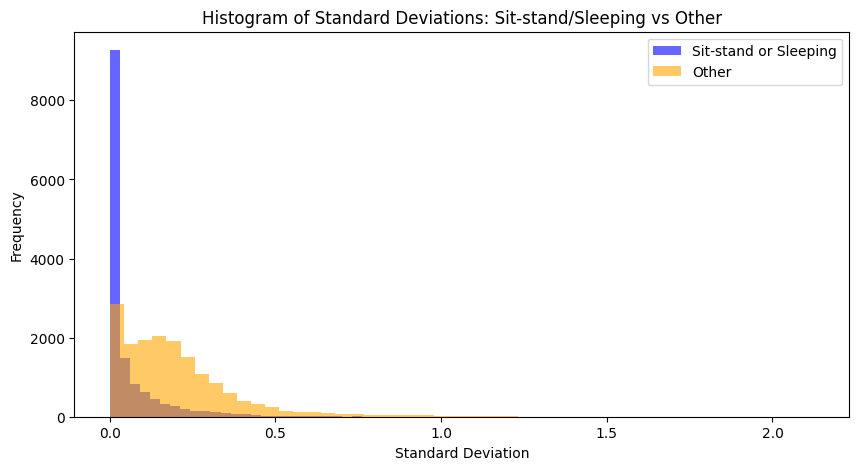

In [22]:
# Calculate stds for each window
stds_1 = np.std(M_norm_1, axis=1)

# Group 1: indices where Y is 'sit-stand' or 'sleeping'
group1_idxs = np.where((Y_1 == "sit-stand") | (Y_1 == "sleeping"))[0]
# Group 2: all other indices
group2_idxs = np.where(((Y_1 == "walking") | (Y_1== 'bicycling')| (Y_1=="mixed")))[0]

# Get stds for each group
group1_stds = stds_1[group1_idxs]
group2_stds = stds_1[group2_idxs]

# Plot histogram
plt.figure(figsize=(10, 5))
plt.hist(group1_stds, bins=50, alpha=0.6, label='Sit-stand or Sleeping', color='blue')
plt.hist(group2_stds, bins=50, alpha=0.6, label='Other', color='orange')
plt.xlabel('Standard Deviation')
plt.ylabel('Frequency')
plt.title('Histogram of Standard Deviations: Sit-stand/Sleeping vs Other')
plt.legend()
plt.show()

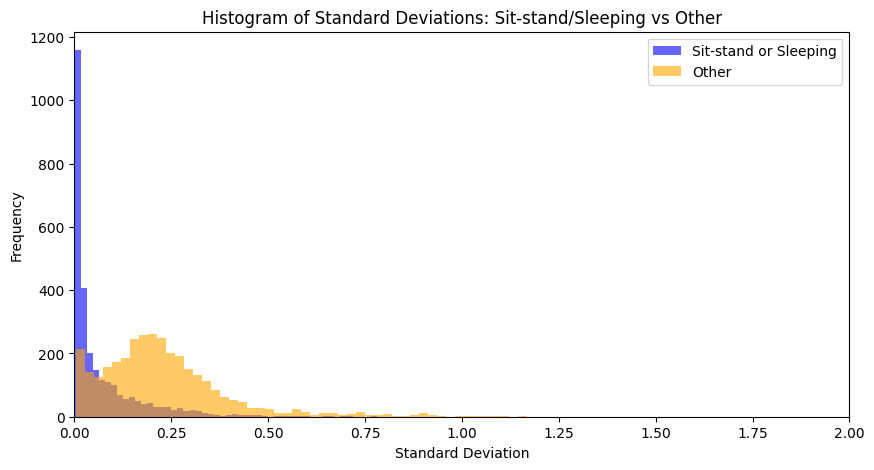

In [24]:
# Calculate stds for each window
stds_10 = np.std(M_norm_10, axis=1)

# Group 1: indices where Y is 'sit-stand' or 'sleeping'
group1_idxs = np.where((Y_10 == "sit-stand") | (Y_10 == "sleeping"))[0]
# Group 2: all other indices
group2_idxs = np.where(((Y_10 == "walking") | (Y_10== 'bicycling')| (Y_10=="mixed")))[0]

# Get stds for each group
group1_stds = stds_10[group1_idxs]
group2_stds = stds_10[group2_idxs]

# Plot histogram
plt.figure(figsize=(10, 5))
plt.hist(group1_stds, bins=50, alpha=0.6, label='Sit-stand or Sleeping', color='blue')
plt.hist(group2_stds, bins=50, alpha=0.6, label='Other', color='orange')
plt.xlabel('Standard Deviation')
plt.ylabel('Frequency')
plt.title('Histogram of Standard Deviations: Sit-stand/Sleeping vs Other')
plt.legend()
plt.xlim(0, 2)
plt.show()

In [ ]:
# Calculate stds for each window
stds_10 = np.std(M_norm_10, axis=1)

# Group 1: indices where Y is 'sit-stand' or 'sleeping'
group1_idxs = np.where((Y_10 == "sit-stand") | (Y_10 == "sleeping"))[0]
# Group 2: all other indices
group2_idxs = np.where(((Y_10 == "walking") | (Y_10== 'bicycling')| (Y_10=="mixed")))[0]

# Get stds for each group
group1_stds = stds_10[group1_idxs]
group2_stds = stds_10[group2_idxs]

# Plot histogram
plt.figure(figsize=(10, 5))
plt.hist(group1_stds, bins=50, alpha=0.6, label='Sit-stand or Sleeping', color='blue')
plt.hist(group2_stds, bins=50, alpha=0.6, label='Other', color='orange')
plt.xlabel('Standard Deviation')
plt.ylabel('Frequency')
plt.title('Histogram of Standard Deviations: Sit-stand/Sleeping vs Other')
plt.legend()
plt.show()

Look at 5 Partipants and plot line distribution

In [ ]:
means_1=[]
stds_1=[]

means_5=[]
stds_5=[]

y_5=[]
y_1=[]

j=0

for i in os.listdir("/data/UKBB/kyra/capture24/"):


    if i.startswith("P") and i.endswith(".csv.gz"):

        j+=1
        
        data = utils.load_data(f'/data/UKBB/kyra/capture24/{i}')  # Use the current file name
        
        X_5, Y_5, T_5 = utils.make_windows(data, winsec=5)
        X_1, Y_1, T_1 = utils.make_windows(data, winsec=1)

        Y_5 = anno_label_dict.loc[Y_5, 'label:Willetts2018'].to_numpy()
        Y_1 = anno_label_dict.loc[Y_1, 'label:Willetts2018'].to_numpy()
        
        M_5 = np.linalg.norm(X_5, axis=2)

        M_norm_5= M_5-1

        mean_m_5= np.mean(M_norm_5, axis=1)

        sd_m_5=np.std(M_norm_5, axis=1)

        M_1 = np.linalg.norm(X_1, axis=2)

        M_norm_1= M_1-1

        mean_m_1= np.mean(M_norm_1, axis=1)

        sd_m_1=np.std(M_norm_1, axis=1)


        means_1.append(mean_m_1)
        means_5.append(mean_m_5)
        stds_1.append(sd_m_1)
        stds_5.append(sd_m_5)
        y_5.append(Y_5)
        y_1.append(Y_1)


        if j==5:

            break



<h5> Visualise

/tmp/ipykernel_889357/1295383169.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab10', len(stds_5))


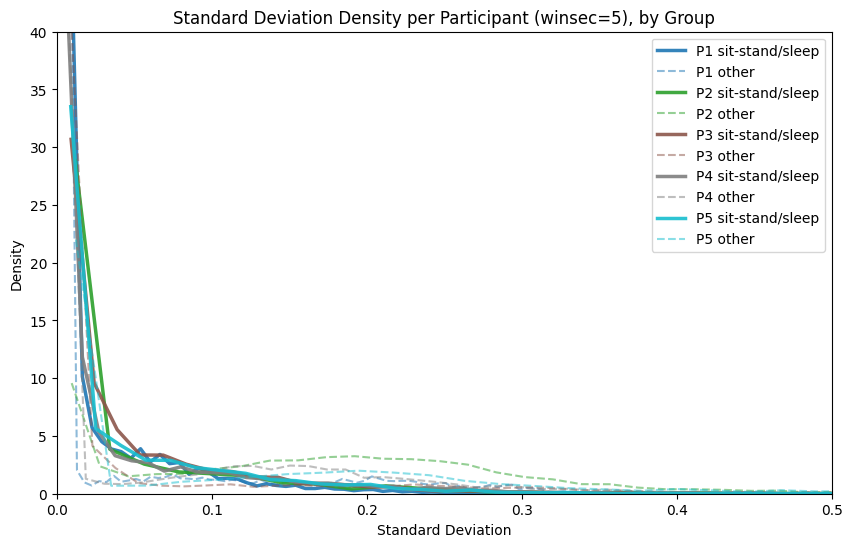

In [52]:
# Plot the density for each participant in each group (winsec=5) with 100 bins, unique color per participant, and line strength for group
import matplotlib.cm as cm

plt.figure(figsize=(10, 6))
colors = cm.get_cmap('tab10', len(stds_5))

for idx, (std_arr, label_arr) in enumerate(zip(stds_5, y_5)):
    group1_mask = (label_arr == "sit-stand") | (label_arr == "sleeping")
    group2_mask = ~group1_mask

    # Group 1: sit-stand or sleeping (solid, thicker)
    if np.any(group1_mask):
        vals = std_arr[group1_mask]
        if len(vals) > 1:
            density, bins = np.histogram(vals, bins=100, density=True)
            centers = (bins[:-1] + bins[1:]) / 2
            plt.plot(centers, density, label=f'P{idx+1} sit-stand/sleep', color=colors(idx), alpha=0.9, linewidth=2.5)

    # Group 2: all other (dashed, thinner)
    if np.any(group2_mask):
        vals = std_arr[group2_mask]
        if len(vals) > 1:
            density, bins = np.histogram(vals, bins=100, density=True)
            centers = (bins[:-1] + bins[1:]) / 2
            plt.plot(centers, density, label=f'P{idx+1} other', color=colors(idx), alpha=0.5, linewidth=1.5, linestyle='--')

plt.xlabel('Standard Deviation')
plt.ylabel('Density')
plt.title('Standard Deviation Density per Participant (winsec=5), by Group')
plt.xlim(0, 0.5)
plt.ylim(0, 40)
plt.legend()
plt.show()

/tmp/ipykernel_889357/4232455970.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab10', len(stds_1))


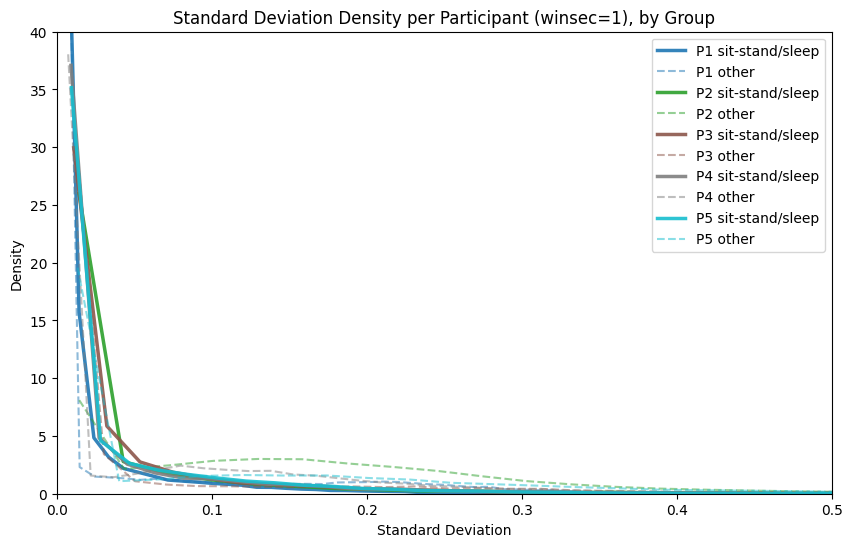

In [54]:
# Plot the density for each participant in each group (winsec=1) with 100 bins, unique color per participant, and line strength for group
import matplotlib.cm as cm

plt.figure(figsize=(10, 6))
colors = cm.get_cmap('tab10', len(stds_1))

for idx, (std_arr, label_arr) in enumerate(zip(stds_1, y_1)):
    group1_mask = (label_arr == "sit-stand") | (label_arr == "sleeping")
    group2_mask = ~group1_mask

    # Group 1: sit-stand or sleeping (solid, thicker)
    if np.any(group1_mask):
        vals = std_arr[group1_mask]
        if len(vals) > 1:
            density, bins = np.histogram(vals, bins=100, density=True)
            centers = (bins[:-1] + bins[1:]) / 2
            plt.plot(centers, density, label=f'P{idx+1} sit-stand/sleep', color=colors(idx), alpha=0.9, linewidth=2.5)

    # Group 2: all other (dashed, thinner)
    if np.any(group2_mask):
        vals = std_arr[group2_mask]
        if len(vals) > 1:
            density, bins = np.histogram(vals, bins=100, density=True)
            centers = (bins[:-1] + bins[1:]) / 2
            plt.plot(centers, density, label=f'P{idx+1} other', color=colors(idx), alpha=0.5, linewidth=1.5, linestyle='--')

plt.xlabel('Standard Deviation')
plt.ylabel('Density')
plt.title('Standard Deviation Density per Participant (winsec=1), by Group')
plt.xlim(0, 0.5)
plt.ylim(0, 40)
plt.legend()
plt.show()

In [61]:

print("5 seconds windows \n")
utils.calculate_statistics(stds_5[1])

print(" \n1 second windows \n")
utils.calculate_statistics(stds_1[1])

5 seconds windows 

Minimum Magnitude: 0.00040668220026418567
Maximum Magnitude: 2.227170705795288
Mean Magnitude: 0.14067505300045013
Standard Deviation: 0.14344297349452972
Median Magnitude: 0.12082468718290329
Range: 2.226763963699341
IQR: 0.21111062169075012
95% Confidence Interval: (-0.14621089398860931, 0.4275609850883484)
 
1 second windows 

Minimum Magnitude: 0.0
Maximum Magnitude: 2.88478684425354
Mean Magnitude: 0.12570013105869293
Standard Deviation: 0.14688725769519806
Median Magnitude: 0.08885375410318375
Range: 2.88478684425354
IQR: 0.18620708584785461
95% Confidence Interval: (-0.16807438433170319, 0.41947466135025024)


<h3> Moving forward with 5 second windows

<h4>Cut of Points for Standard Deviation Based tokens

In [62]:
# maximise seperation between rest and movement


# Combine all participants' stds_5 and y_5 into single arrays for group comparison

all_stds_5 = np.concatenate(stds_5)
all_y_5 = np.concatenate(y_5)

# Group 1: rest ('sit-stand' or 'sleeping')
rest_mask = (all_y_5 == "sit-stand") | (all_y_5 == "sleeping")
group_rest = all_stds_5[rest_mask]

# Group 2: non-rest (all others)
nonrest_mask = ~rest_mask
group_nonrest = all_stds_5[nonrest_mask]

from scipy.stats import ks_2samp
stat, p_value = ks_2samp(group_rest, group_nonrest)  # Measures maximum separation

print(f"KS statistic: {stat:.4f}, p-value: {p_value:.4e}")



KS statistic: 0.2378, p-value: 0.0000e+00


In [68]:
# Fit LDA to your two groups (rest vs non-rest) using standard deviation as the feature

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Prepare X and y for LDA
X = np.concatenate([group_rest, group_nonrest]).reshape(-1, 1)
y = np.concatenate([np.zeros(len(group_rest)), np.ones(len(group_nonrest))])  # 0=rest, 1=non-rest

lda = LinearDiscriminantAnalysis()
lda.fit(X, y)
decision_value = -lda.intercept_[0] / lda.coef_[0][0]

print(f"LDA decision boundary (std): {decision_value:.4f}")

LDA decision boundary (std): -0.0118


In [66]:
# Fit logistic regression to your two groups (rest vs non-rest) using standard deviation as the feature

from sklearn.linear_model import LogisticRegression
import numpy as np

X = np.concatenate([group_rest, group_nonrest]).reshape(-1, 1)
y = np.array([0]*len(group_rest) + [1]*len(group_nonrest))  # 0=rest, 1=non-rest

model = LogisticRegression().fit(X, y)
threshold = -model.intercept_[0] / model.coef_[0][0]

print(f"Logistic regression threshold (std): {threshold:.4f}")

Logistic regression threshold (std): 0.0112


Decision tree cut point (std): 0.1446


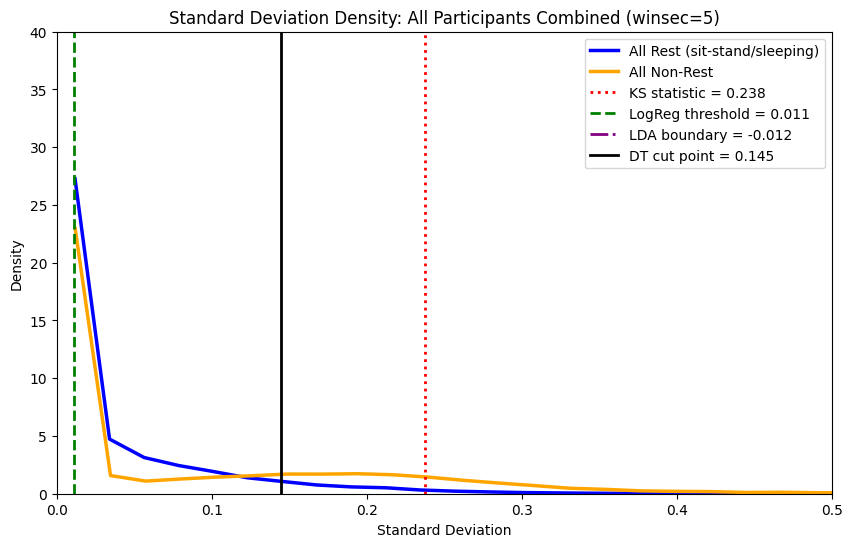

In [70]:
# Fit a decision tree (max_depth=1) to your two groups (rest vs non-rest) using standard deviation as the feature
from sklearn.tree import DecisionTreeClassifier

X = np.concatenate([group_rest, group_nonrest]).reshape(-1, 1)
y = np.array([0]*len(group_rest) + [1]*len(group_nonrest))  # 0=rest, 1=non-rest

model = DecisionTreeClassifier(max_depth=1)
model.fit(X, y)
cut_point = model.tree_.threshold[0]

print(f"Decision tree cut point (std): {cut_point:.4f}")

# Add cut point to the plot
plt.figure(figsize=(10, 6))

# All rest
density_rest, bins_rest = np.histogram(group_rest, bins=100, density=True)
centers_rest = (bins_rest[:-1] + bins_rest[1:]) / 2
plt.plot(centers_rest, density_rest, label='All Rest (sit-stand/sleeping)', color='blue', linewidth=2.5)

# All non-rest
density_nonrest, bins_nonrest = np.histogram(group_nonrest, bins=100, density=True)
centers_nonrest = (bins_nonrest[:-1] + bins_nonrest[1:]) / 2
plt.plot(centers_nonrest, density_nonrest, label='All Non-Rest', color='orange', linewidth=2.5)

# Plot vertical lines for thresholds
plt.axvline(stat, color='red', linestyle=':', linewidth=2, label=f'KS statistic = {stat:.3f}')
plt.axvline(threshold, color='green', linestyle='--', linewidth=2, label=f'LogReg threshold = {threshold:.3f}')
plt.axvline(decision_value, color='purple', linestyle='-.', linewidth=2, label=f'LDA boundary = {decision_value:.3f}')
plt.axvline(cut_point, color='black', linestyle='-', linewidth=2, label=f'DT cut point = {cut_point:.3f}')

plt.xlabel('Standard Deviation')
plt.ylabel('Density')
plt.title('Standard Deviation Density: All Participants Combined (winsec=5)')
plt.xlim(0, 0.5)
plt.ylim(0, 40)
plt.legend()
plt.show()

Quantization to take into account decision tree cut point

In [84]:
# Calculate histogram and statistics for your data
all_stds_5_array = np.array(all_stds_5).flatten()  # Use your combined stds array

counts, bin_edges = np.histogram(all_stds_5_array, bins=100)
mean_val = np.mean(all_stds_5_array)
std_val = np.std(all_stds_5_array)
median_val = np.median(all_stds_5_array)

def find_bin(val, bin_edges):
    """Return the index of the bin that val falls into."""
    return np.searchsorted(bin_edges, val, side='right') - 1

# Calculate all std dev points, now including ±4 and ±5 std devs
sd_points = [
    
    mean_val - 0.5*std_val,
    mean_val,
    mean_val + 0.5*std_val,
    mean_val + 1*std_val,
    mean_val + 1.5*std_val,
    mean_val + 2*std_val,
    mean_val + 2.5*std_val,
    mean_val + 3*std_val,
    mean_val + 3.5*std_val,
    mean_val + 4*std_val,
    mean_val + 4.5*std_val,
    mean_val + 5*std_val,
    mean_val + 5.5*std_val,
    mean_val + 6*std_val,
    mean_val + 6.5*std_val,
    mean_val + 7*std_val,
    mean_val + 7.5*std_val,
    mean_val +8*std_val
    
]

# Add median if it is different from mean
if not np.isclose(median_val, mean_val):
    sd_points.append(median_val)

# Find the mode bin (bin with the highest count)
mode_bin_idx = np.argmax(counts)
mode_bin_left = bin_edges[mode_bin_idx]
mode_bin_right = bin_edges[mode_bin_idx + 1]

# Add cut points for each side of the mode bin
sd_points.extend([mode_bin_left, mode_bin_right])

# Sort the cut points for clarity
sd_cuts = np.sort(np.array(sd_points))

# Print the bin for each cut point
for val in sd_cuts:
    bin_idx = find_bin(val, bin_edges)
    print(f"Value {val:.3f} is in bin {bin_idx} ({bin_edges[bin_idx]:.3f} to {bin_edges[bin_idx+1]:.3f})")

print("sd_cuts:", sd_cuts)

Value 0.000 is in bin 0 (0.000 to 0.023)
Value 0.012 is in bin 0 (0.000 to 0.023)
Value 0.013 is in bin 0 (0.000 to 0.023)
Value 0.023 is in bin 1 (0.023 to 0.046)
Value 0.081 is in bin 3 (0.069 to 0.092)
Value 0.149 is in bin 6 (0.137 to 0.160)
Value 0.217 is in bin 9 (0.206 to 0.228)
Value 0.286 is in bin 12 (0.274 to 0.297)
Value 0.354 is in bin 15 (0.342 to 0.365)
Value 0.422 is in bin 18 (0.411 to 0.433)
Value 0.491 is in bin 21 (0.479 to 0.502)
Value 0.559 is in bin 24 (0.547 to 0.570)
Value 0.628 is in bin 27 (0.616 to 0.639)
Value 0.696 is in bin 30 (0.684 to 0.707)
Value 0.764 is in bin 33 (0.753 to 0.775)
Value 0.833 is in bin 36 (0.821 to 0.844)
Value 0.901 is in bin 39 (0.889 to 0.912)
Value 0.969 is in bin 42 (0.958 to 0.980)
Value 1.038 is in bin 45 (1.026 to 1.049)
Value 1.106 is in bin 48 (1.094 to 1.117)
Value 1.175 is in bin 51 (1.163 to 1.186)
sd_cuts: [4.0668220e-04 1.2116797e-02 1.2556756e-02 2.3198316e-02 8.0500513e-02
 1.4888424e-01 2.1726795e-01 2.8565165e-01 3.

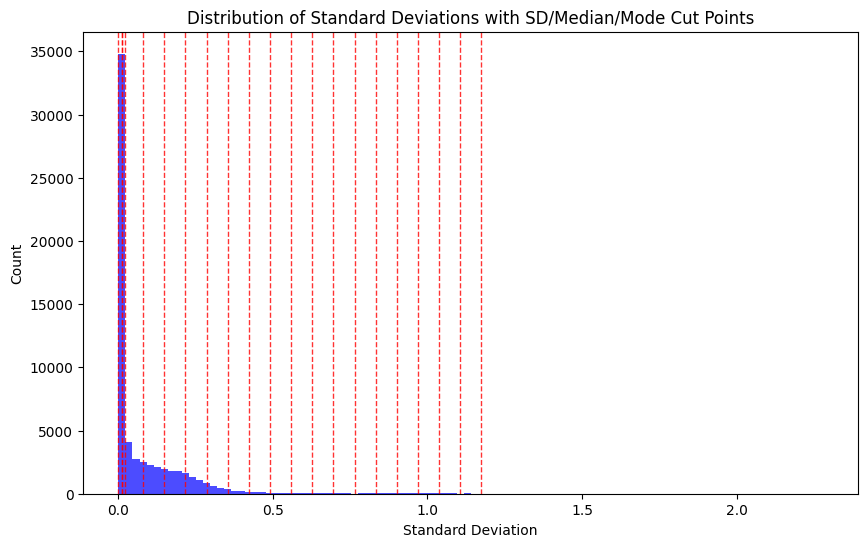

In [85]:
# Plot histogram of all_stds_5_array with vertical lines for sd_cuts

plt.figure(figsize=(10,6))
plt.hist(all_stds_5_array, bins=100, alpha=0.7, color='blue')
plt.xlabel("Standard Deviation")
plt.ylabel("Count")
plt.title("Distribution of Standard Deviations with SD/Median/Mode Cut Points")

# Add vertical lines for each cut point
for cut in sd_cuts:
    plt.axvline(cut, color='red', linestyle='--', linewidth=1, alpha=0.8)

plt.show()

clipping values above 1
proportional cuts- frequency/qunatiles

In [ ]:
# Plot histogram of all_stds_5_array with vertical lines for sd_cuts

plt.figure(figsize=(10,6))
plt.hist(all_stds_5_array, bins=100, alpha=0.7, color='blue')
plt.xlabel("Standard Deviation")
plt.ylabel("Count")
plt.title("Distribution of Standard Deviations with SD/Median/Mode Cut Points")

# Add vertical lines for each cut point
for cut in sd_cuts:
    plt.axvline(cut, color='red', linestyle='--', linewidth=1, alpha=0.8)

plt.show()

In [95]:
#export cuts 

# Export sd_cuts as a DataFrame

# Add 0 at the start of sd_cuts
sd_cuts_with_zero = np.insert(sd_cuts, 0, 0)

sd_cuts_df = pd.DataFrame({'sd_cut_points': sd_cuts_with_zero})


In [96]:
# Export to CSV
sd_cuts_df.to_csv("sd_cut_points.csv", index=False)